### Welcome to my Capstone! I will be taking a look at Ether pricing data and doing discovery, exploration, cleaning and general analysis through visualization, pair plots and correlation matrixes to get a sense of the data before going into the models 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sqlalchemy import create_engine
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')


/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


### Loading the data


In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/irenebratsis/Thinkful/master/ethereum_dataset.csv")


In [3]:
df.head()


,Date(UTC),UnixTimeStamp,eth_etherprice,eth_tx,eth_address,eth_supply,eth_marketcap,eth_hashrate,eth_difficulty,eth_blocks,eth_uncles,eth_blocksize,eth_blocktime,eth_gasprice,eth_gaslimit,eth_gasused,eth_ethersupply,eth_ens_register
0,7/30/2015,1438214400,0.0,8893,9205,7.204931e+07,0.0,11.5297,0.121,6912,1299,644,4.46,0,0,0,39316.09375,NaN
1,7/31/2015,1438300800,0.0,0,9361,7.208550e+07,0.0,51.4594,0.603,6863,511,582,12.58,0,0,0,36191.71875,NaN
2,8/1/2015,1438387200,0.0,0,9476,7.211320e+07,0.0,57.7845,0.887,5293,334,575,16.34,0,0,0,27705.93750,NaN
3,8/2/2015,1438473600,0.0,0,9563,7.214143e+07,0.0,67.9224,1.020,5358,394,581,16.12,0,0,0,28223.43750,NaN
4,8/3/2015,1438560000,0.0,0,9639,7.216940e+07,0.0,74.5737,1.126,5280,443,587,16.37,0,0,0,27976.71875,NaN


In [4]:
df.describe()

,UnixTimeStamp,eth_etherprice,eth_tx,eth_address,eth_supply,eth_marketcap,eth_hashrate,eth_difficulty,eth_blocks,eth_uncles,eth_blocksize,eth_blocktime,eth_gasprice,eth_gaslimit,eth_gasused,eth_ethersupply,eth_ens_register
count,9.340000e+02,934.000000,9.340000e+02,9.340000e+02,9.340000e+02,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,9.340000e+02,9.340000e+02,9.340000e+02,934.000000,294.000000
mean,1.478540e+09,144.155814,1.769615e+05,3.475212e+06,8.547182e+07,13718.483322,37142.386082,565.982695,5470.884368,516.360814,6011.986081,16.020578,3.733017e+10,4.573157e+06,7.944123e+09,27484.238725,682.227891
std,2.333990e+07,260.446827,2.732852e+05,6.053198e+06,7.849074e+06,25214.340835,57622.685360,862.787200,773.100316,320.637714,8038.566658,3.197617,5.093189e+10,1.731189e+06,1.198038e+10,4829.841152,774.888801
min,1.438214e+09,0.000000,0.000000e+00,9.205000e+03,7.204931e+07,0.000000,11.529700,0.121000,2829.000000,126.000000,575.000000,4.460000,0.000000e+00,0.000000e+00,0.000000e+00,14852.500000,0.000000
25%,1.458367e+09,7.652500,3.008325e+04,1.244900e+05,7.826808e+07,654.651087,1396.803875,19.459250,5046.750000,352.250000,1318.000000,14.140000,2.257898e+10,3.141800e+06,9.565356e+08,24715.078125,131.500000
50%,1.478520e+09,11.965000,4.586450e+04,7.875195e+05,8.575763e+07,1004.981055,5956.319100,78.132000,5864.500000,416.500000,1623.500000,14.575000,2.416869e+10,4.310826e+06,1.579041e+09,28026.171875,341.000000
75%,1.498673e+09,228.625000,2.463598e+05,3.775781e+06,9.289034e+07,21313.163174,61147.313050,959.577000,6037.000000,498.750000,8786.750000,16.890000,5.075070e+10,5.198700e+06,1.230693e+10,31674.882812,886.250000
max,1.519085e+09,1385.020000,1.349890e+06,2.704779e+07,9.768027e+07,134210.789028,243542.069800,3031.012000,6912.000000,2096.000000,33681.000000,30.310000,9.395883e+11,7.999398e+06,4.396431e+10,39316.093750,3863.000000


### Checking for missing data


In [5]:
df.isnull().sum()*100/df.count()


Date(UTC)             0.000000
UnixTimeStamp         0.000000
eth_etherprice        0.000000
eth_tx                0.000000
eth_address           0.000000
eth_supply            0.000000
eth_marketcap         0.000000
eth_hashrate          0.000000
eth_difficulty        0.000000
eth_blocks            0.000000
eth_uncles            0.000000
eth_blocksize         0.000000
eth_blocktime         0.000000
eth_gasprice          0.000000
eth_gaslimit          0.000000
eth_gasused           0.000000
eth_ethersupply       0.000000
eth_ens_register    217.687075
dtype: float64

### Exploratory data analysis and feature selection


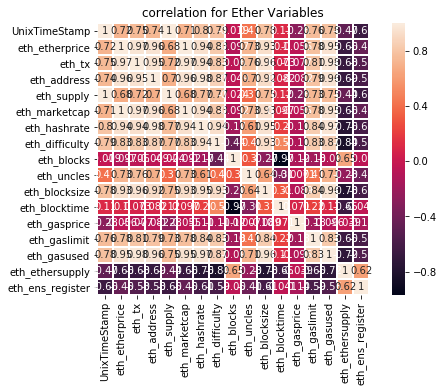

In [6]:
import seaborn as sns

corrmat_df = df.corr()

plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
# draw the heatmap using seaborn.
sns.heatmap(corrmat_df, square=True, annot=True, linewidths=.5)
plt.title("correlation for Ether Variables")

plt.show()

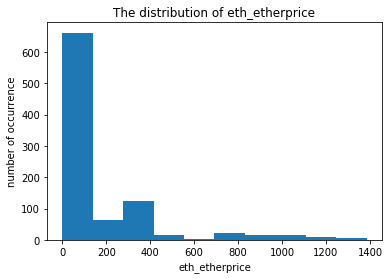

In [7]:
plt.hist(df.eth_etherprice)
plt.title("The distribution of eth_etherprice")
plt.xlabel("eth_etherprice")
plt.ylabel("number of occurrence")
plt.show()

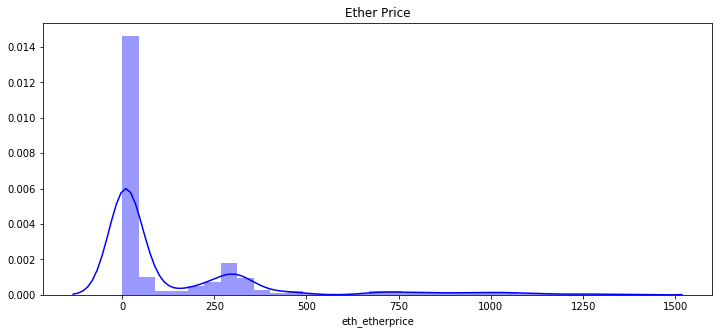

In [8]:
import pylab as pl
pl.figure(figsize=(12,5))
pl.title("Ether Price")
ax = sns.distplot(df["eth_etherprice"], color = 'b')

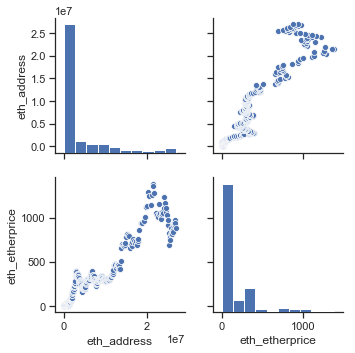

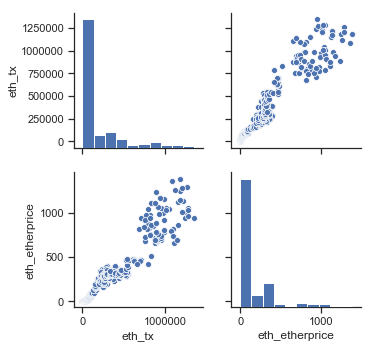

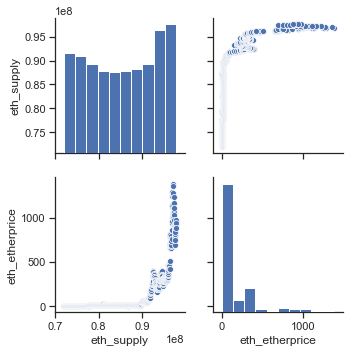

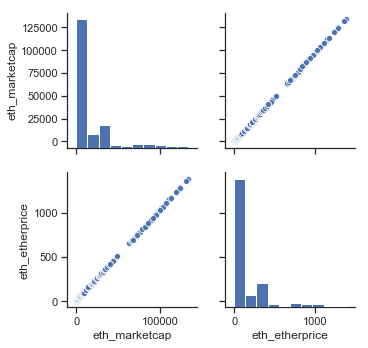

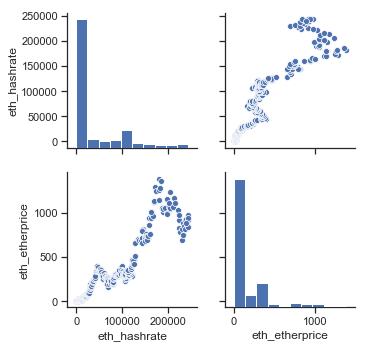

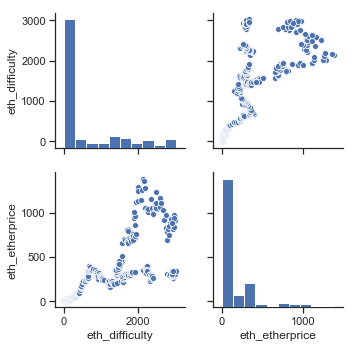

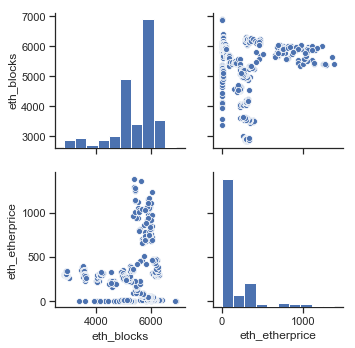

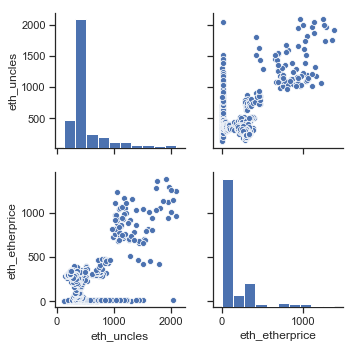

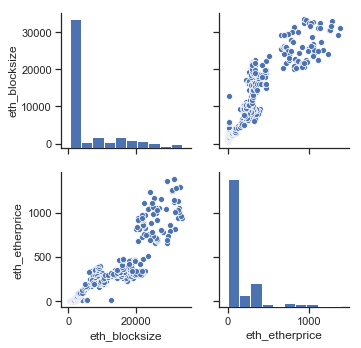

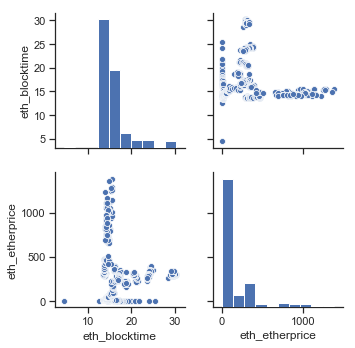

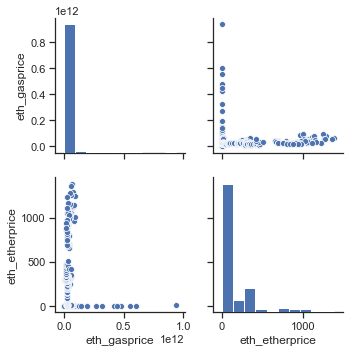

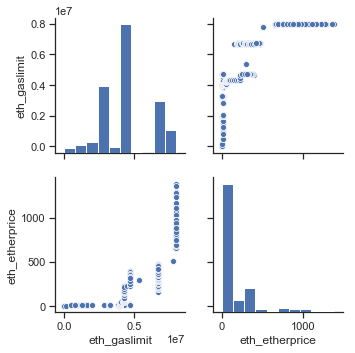

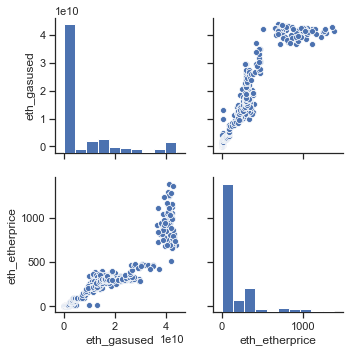

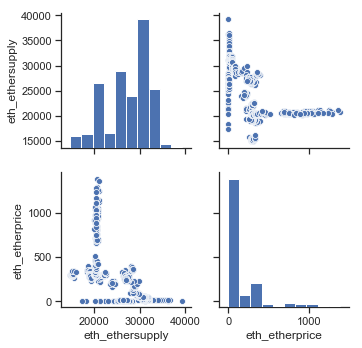

In [9]:

import seaborn as sns
sns.set(style="ticks") 
sns.pairplot(df[['eth_address', 'eth_etherprice']])
sns.pairplot(df[['eth_tx', 'eth_etherprice']])
sns.pairplot(df[['eth_supply', 'eth_etherprice']])
sns.pairplot(df[['eth_marketcap', 'eth_etherprice']])
sns.pairplot(df[['eth_hashrate', 'eth_etherprice']])
sns.pairplot(df[['eth_difficulty', 'eth_etherprice']])
sns.pairplot(df[['eth_blocks', 'eth_etherprice']])
sns.pairplot(df[['eth_uncles', 'eth_etherprice']])
sns.pairplot(df[['eth_blocksize', 'eth_etherprice']])
sns.pairplot(df[['eth_blocktime', 'eth_etherprice']])
sns.pairplot(df[['eth_gasprice', 'eth_etherprice']])
sns.pairplot(df[['eth_gaslimit', 'eth_etherprice']])
sns.pairplot(df[['eth_gasused', 'eth_etherprice']])
sns.pairplot(df[['eth_ethersupply', 'eth_etherprice']])

In [10]:
df[df.columns[1:]].corr()['eth_etherprice'][:]


UnixTimeStamp       0.719126
eth_etherprice      1.000000
eth_tx              0.965697
eth_address         0.959472
eth_supply          0.684217
eth_marketcap       0.999913
eth_hashrate        0.940936
eth_difficulty      0.830485
eth_blocks         -0.096938
eth_uncles          0.726335
eth_blocksize       0.931237
eth_blocktime       0.101525
eth_gasprice       -0.056474
eth_gaslimit        0.778550
eth_gasused         0.951745
eth_ethersupply    -0.662753
eth_ens_register   -0.448694
Name: eth_etherprice, dtype: float64

'eth_tx', 'eth_address', 'eth_marketcap', 'eth_hashrate', 'eth_blocksize', 'eth_gasused', 'eth_gaslimit', 'eth_difficulty', 'eth_uncles'

### These are the 9 variables that I found most impactful to eth_etherprice based on the .corr list as well as other data exploration steps done above. 

For this reason I will be using these variables in my model preparations further in this challenge. I will be working with these variables in my models as explore the best combination of variables to include in my models.

In [11]:

df.corr()

,UnixTimeStamp,eth_etherprice,eth_tx,eth_address,eth_supply,eth_marketcap,eth_hashrate,eth_difficulty,eth_blocks,eth_uncles,eth_blocksize,eth_blocktime,eth_gasprice,eth_gaslimit,eth_gasused,eth_ethersupply,eth_ens_register
UnixTimeStamp,1.000000,0.719126,0.751931,0.737892,0.998030,0.714228,0.799439,0.790629,-0.018580,0.412177,0.784365,0.114419,-0.277059,0.760396,0.782997,-0.471521,-0.656220
eth_etherprice,0.719126,1.000000,0.965697,0.959472,0.684217,0.999913,0.940936,0.830485,-0.096938,0.726335,0.931237,0.101525,-0.056474,0.778550,0.951745,-0.662753,-0.448694
eth_tx,0.751931,0.965697,1.000000,0.948858,0.716735,0.965275,0.938709,0.825023,-0.059896,0.762968,0.961355,0.073231,-0.076978,0.806484,0.981541,-0.677751,-0.534415
eth_address,0.737892,0.959472,0.948858,1.000000,0.699377,0.960960,0.978847,0.865705,-0.049113,0.696578,0.921214,0.081544,-0.081722,0.788673,0.958301,-0.690293,-0.583515
eth_supply,0.998030,0.684217,0.716735,0.699377,1.000000,0.678881,0.766949,0.767448,-0.023944,0.374247,0.753543,0.120670,-0.280120,0.734942,0.748822,-0.444549,-0.650840
eth_marketcap,0.714228,0.999913,0.965275,0.960960,0.678881,1.000000,0.940225,0.827592,-0.092000,0.729682,0.929211,0.096609,-0.054597,0.775385,0.950631,-0.660459,-0.453844
eth_hashrate,0.799439,0.940936,0.938709,0.978847,0.766949,0.940225,1.000000,0.935119,-0.168513,0.610231,0.949353,0.202920,-0.105434,0.841444,0.966337,-0.762958,-0.605833
eth_difficulty,0.790629,0.830485,0.825023,0.865705,0.767448,0.827592,0.935119,1.000000,-0.435121,0.399314,0.927948,0.500532,-0.114255,0.828375,0.867115,-0.835569,-0.593650
eth_blocks,-0.018580,-0.096938,-0.059896,-0.049113,-0.023944,-0.092000,-0.168513,-0.435121,1.000000,0.298980,-0.268241,-0.967360,-0.122634,-0.176989,-0.089762,0.650843,-0.050144
eth_uncles,0.412177,0.726335,0.762968,0.696578,0.374247,0.729682,0.610231,0.399314,0.298980,1.000000,0.638092,-0.313990,-0.007124,0.412018,0.714500,-0.231459,-0.412083


### The variables I ended up keeping after a few iterations with different models in consideration of Pvalues and correlation values  <br>
'eth_address'<br>
'eth_hashrate'<br>
'eth_tx'<br>
'eth_blocksize' <br>
'eth_difficulty' <br>
'eth_gasprice' <br>


### Before we get started, I will be moving our pricing by 30 days so that our variables are matched with a date in the future. This will allow our model to use existing variables for pricing 30 days in the future so that we can later use it for predicitons. 

Doing this will make sure that our models can predict ether prices 30 days in the future, otherwise our model isn't telling us much as the data we collect happens in real time. Below I create a new column called ether30.

In [12]:
df['ether30'] = df['eth_etherprice'].shift(-30)


In [13]:
df[['Date(UTC)', 'ether30', 'eth_etherprice']].head(50)

,Date(UTC),ether30,eth_etherprice
0,7/30/2015,1.18,0.00
1,7/31/2015,1.32,0.00
2,8/1/2015,1.31,0.00
3,8/2/2015,1.36,0.00
4,8/3/2015,1.14,0.00
5,8/4/2015,1.23,0.00
6,8/5/2015,1.35,0.00
7,8/6/2015,1.37,0.00
8,8/7/2015,1.34,3.00
9,8/8/2015,1.28,1.20


I don't want to alter the existing data so I'm creating a new df called df_new so that I can include only the columns I want to include in my model, along with my new ether30 column.

In [14]:
df_new = df[['ether30', 'eth_address', 'eth_hashrate', 'eth_tx', 'eth_blocksize', 'eth_difficulty', 'eth_gasprice']].copy ()




Removing NAs from the new ether30 column and checking to make sure I don't have any others in the next two cells:

In [15]:
df_new.dropna(inplace=True)

In [16]:
df_new.isnull().sum()*100/df_new.count()


ether30           0.0
eth_address       0.0
eth_hashrate      0.0
eth_tx            0.0
eth_blocksize     0.0
eth_difficulty    0.0
eth_gasprice      0.0
dtype: float64

Here I'm checking to make sure I haven't lost much data. I still have about 904 rows of data which is a good sign. 

In [17]:
df['ether30'].describe()

count     904.000000
mean      148.906283
std       263.406040
min         0.420000
25%         8.307500
50%        12.215000
75%       253.237500
max      1385.020000
Name: ether30, dtype: float64

### It looks like we're ready for the next step. Let's begin our model exploration!

### OLS: 

### First up OLS with R-squared of the model is 0.898 and the test R-squared is 0.889

It could be indicative of overfitting but my test and training scores are similar, so it looks like I can trust the results. Lets see how other models perform! 

In [18]:

import warnings
warnings.filterwarnings(action="ignore")

In [19]:


X = df_new[['eth_address', 'eth_hashrate', 'eth_tx', 'eth_blocksize', 'eth_difficulty']] 
Y = df_new['ether30']

#This model is not discriminating for timestamps previous to 30 day threshhold. 
#X_train = X[:700]
#X_test = X[700:]

#Y_train = Y[:700]
#Y_test = Y[700:]


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)


print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))


# We fit an OLS model using sklearn
lrm = LinearRegression()
lrm.fit(X_train, Y_train)


# We are making predictions here
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)

print("R-squared of the model in the training set is: {}".format(lrm.score(X_train, Y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in the test set is: {}".format(lrm.score(X_test, Y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(Y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(Y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(Y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - y_preds_test) / Y_test)) * 100))



The number of observations in training set is 723
The number of observations in test set is 181
R-squared of the model in the training set is: 0.8985831338240027
-----Test set statistics-----
R-squared of the model in the test set is: 0.8896944272555466
Mean absolute error of the prediction is: 42.39871596133024
Mean squared error of the prediction is: 7572.23276225187
Root mean squared error of the prediction is: 87.0185771100164
Mean absolute percentage error of the prediction is: 90.68081323695678


### Next up Ridge produced a score of 0.897 for the training set and a 0.888 score for the test set 



In [20]:
from sklearn.linear_model import Ridge

# Fitting a ridge regression model. Alpha is the regularization
# parameter (usually called lambda). As alpha gets larger, parameter
# shrinkage grows more pronounced.
ridgeregr = Ridge(fit_intercept = False) 
ridgeregr.fit(X_train, Y_train)

# We are making predictions here
y_preds_train = ridgeregr.predict(X_train)
y_preds_test = ridgeregr.predict(X_test)

print("R-squared of the model on the training set is: {}".format(ridgeregr.score(X_train, Y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(ridgeregr.score(X_test, Y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(Y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(Y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(Y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - y_preds_test) / Y_test)) * 100))



R-squared of the model on the training set is: 0.8978490284048615
-----Test set statistics-----
R-squared of the model on the test set is: 0.8888521981400138
Mean absolute error of the prediction is: 45.6945289861174
Mean squared error of the prediction is: 7630.049921832145
Root mean squared error of the prediction is: 87.35015696512596
Mean absolute percentage error of the prediction is: 239.02944181207894


### Lasso got a score of 0.898 for the training set and a 0.889 score for the test set, just about the same as OLS.

In [21]:
from sklearn.linear_model import Lasso

lassoregr = Lasso() 
lassoregr.fit(X_train, Y_train)

# We are making predictions here
y_preds_train = lassoregr.predict(X_train)
y_preds_test = lassoregr.predict(X_test)

print("R-squared of the model on the training set is: {}".format(lassoregr.score(X_train, Y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(lassoregr.score(X_test, Y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(Y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(Y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(Y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - y_preds_test) / Y_test)) * 100))


R-squared of the model on the training set is: 0.8985831191662191
-----Test set statistics-----
R-squared of the model on the test set is: 0.8896938659938446
Mean absolute error of the prediction is: 42.39713147942136
Mean squared error of the prediction is: 7572.271291622084
Root mean squared error of the prediction is: 87.01879849562441
Mean absolute percentage error of the prediction is: 90.73479568259802


### ElasticNet got a score of 0.898 for the training set and a 0.889 score for the test set, along with OLS and Lasso

In [22]:
from sklearn.linear_model import ElasticNet

elasticregr = ElasticNet() 
elasticregr.fit(X_train, Y_train)

# We are making predictions here
y_preds_train = elasticregr.predict(X_train)
y_preds_test = elasticregr.predict(X_test)

print("R-squared of the model on the training set is: {}".format(elasticregr.score(X_train, Y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(elasticregr.score(X_test, Y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(Y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(Y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(Y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - y_preds_test) / Y_test)) * 100))


R-squared of the model on the training set is: 0.8985831232126544
-----Test set statistics-----
R-squared of the model on the test set is: 0.8896939408304875
Mean absolute error of the prediction is: 42.397465444487636
Mean squared error of the prediction is: 7572.266154252633
Root mean squared error of the prediction is: 87.01876897688587
Mean absolute percentage error of the prediction is: 90.72447757273403


### Again here we see the same score as OLS, Lasso and ElasticNet: a score of 0.898 for the training set and a 0.889 score for the test set

In [23]:
lrm = LinearRegression()

lrm.fit(X_train, Y_train)

# We are making predictions here
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)

print("R-squared of the model in training set is: {}".format(lrm.score(X_train, Y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lrm.score(X_test, Y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(Y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(Y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(Y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - y_preds_test) / Y_test)) * 100))

R-squared of the model in training set is: 0.8985831338240027
-----Test set statistics-----
R-squared of the model in test set is: 0.8896944272555466
Mean absolute error of the prediction is: 42.39871596133024
Mean squared error of the prediction is: 7572.23276225187
Root mean squared error of the prediction is: 87.0185771100164
Mean absolute percentage error of the prediction is: 90.68081323695678


### Random Forest: For fun, why not

In [24]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn import ensemble

randomforest = RandomForestRegressor()
randomforest.fit(X_train, Y_train)
randomforest.score(X_test, Y_test)






0.9940330086044359

Accounting for test score below: appx. 0.962

In [25]:
cross_val_score(randomforest, X_test, Y_test, cv=10)

array([0.9491968 , 0.94922887, 0.97426398, 0.96202586, 0.97348678,
       0.99491192, 0.9764517 , 0.96363981, 0.96975411, 0.98030483])

In [26]:
import statistics

data = [0.96906062, 0.94844658, 0.94470685, 0.97056179, 0.97284841,
       0.98021631, 0.98151656, 0.95956996, 0.95165316, 0.94865387]

x = statistics.mean(data)
print(x)


0.962723411


### And finally, KNN:

In [27]:
from sklearn import neighbors
from sklearn import neighbors
from numba import jit
import numpy
import matplotlib.pyplot as pyplot
import seaborn
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=6)
knn.fit(X_train, Y_train)
knn.score(X_test, Y_test)



0.994602173372774

### Well this appears to be our best working model! Let's deep dive into the scoring to see how the training and test sets compare.


In [33]:
# Run the same model, this time with weights.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=4, weights='distance')
knn_w.fit(X_train, Y_train)
knn_w.score(X_test, Y_test)


0.9964397835083468

In [34]:
def get_r_squared(max_neighbors=10):
    train_score = []
    test_score = []
    models = []
    for neighbors in range(1, max_neighbors+1):
        model = KNeighborsRegressor(n_neighbors=neighbors)
        model.fit(X_train, Y_train)
        train_score.append(model.score(X_train, Y_train))
        test_score.append(model.score(X_test, Y_test))
        models.append(model)
    return train_score, test_score, models

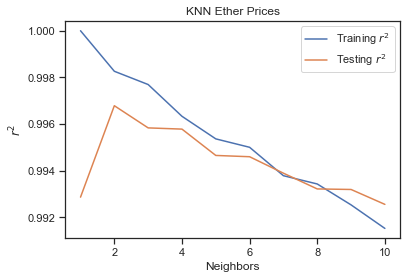

In [35]:
train_score, test_score, models = get_r_squared()
neighbors = range(1, 11)
pyplot.plot(neighbors, train_score, label="Training $r^2$")
pyplot.plot(neighbors, test_score, label="Testing $r^2$")
pyplot.xlabel("Neighbors")
pyplot.ylabel("$r^2$")
pyplot.title("KNN Ether Prices")
pyplot.legend()

In [48]:
# Run the same model, this time with weights and 4 nearest neighbor.
from sklearn import neighbors

knn_w = neighbors.KNeighborsRegressor(n_neighbors=4, weights='distance')
knn_w.fit(X_train, Y_train)
knn_w.score(X_test, Y_test)

0.9964397835083468

In [44]:
print(knn_w.score(X_train, Y_train))

1.0



### For the purposes of selecting a model, I'll go with this KNN regression model weighted and selecting 2 nearest neighbors appears to be optimal. This gives us a R sq score of 1 with a testing R sq of 0.996 which is great! Although maybe too good... highly suspicious... Thank you!